# VIRTUAL_INTERIOR_DESIGN_ASSISTANT

# *1. Installation and Imports*

In [3]:
# Install necessary libraries
!pip install tensorflow numpy matplotlib

# Import libraries
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


#2. Loading Dataset (Images)

In [15]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()
drive.mount('/content/drive', force_remount=True)

# Path to the folder containing images
image_folder = '/content/sample_data/sample_interior'

# Check the number of images in the folder
image_files = os.listdir(image_folder)
print(f"Total images: {len(image_files)}")



Mounted at /content/drive
Mounted at /content/drive
Total images: 1872


#3. Shuffling and Splitting the Data





In [16]:
# Shuffle and split the data into training, validation, and test sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

print(f"Training images: {len(train_files)}, Validation images: {len(val_files)}, Test images: {len(test_files)}")


Training images: 1197, Validation images: 300, Test images: 375


#4. Preprocessing and Tokenization

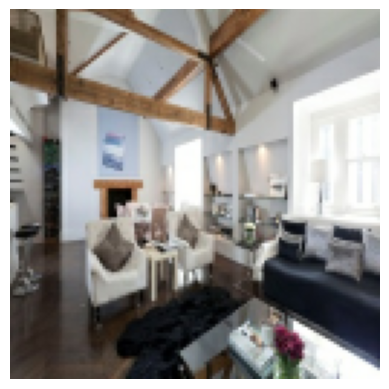

In [17]:
# Image size for the model
image_size = (128, 128)

# Create a function to preprocess images
def preprocess_image(file_path):
    img = tf.io.read_file(os.path.join(image_folder, file_path))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, image_size)
    img = tf.cast(img, tf.float32) / 255.0  # Normalize pixel values
    return img

# Example of preprocessing an image
sample_image = preprocess_image(train_files[0])
plt.imshow(sample_image)
plt.axis('off')
plt.show()


#5. Dataset Visualization

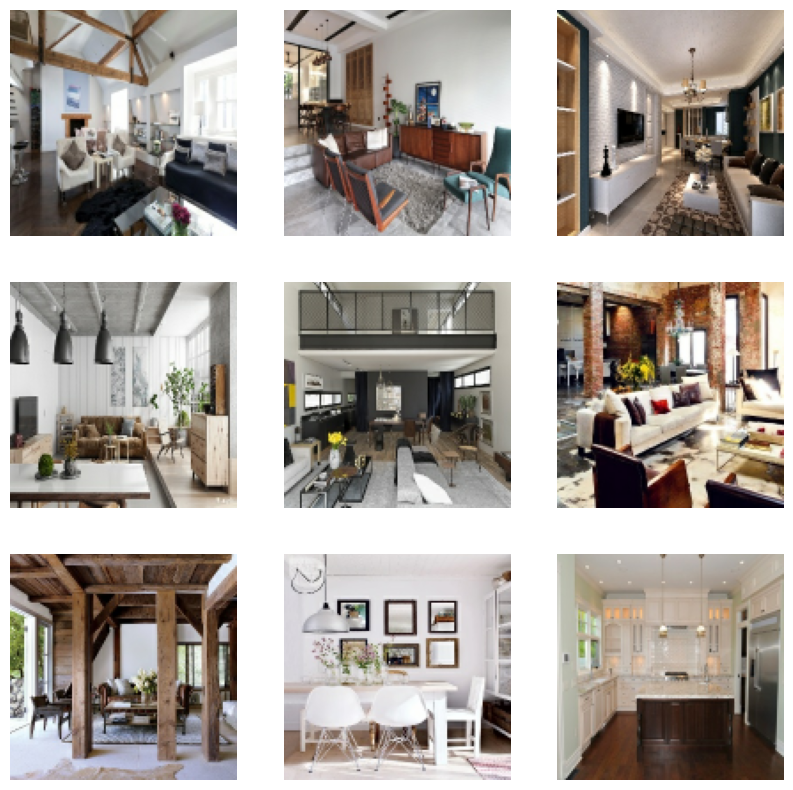

In [18]:
# Visualize a few images from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(preprocess_image(train_files[i]))
    plt.axis('off')
plt.show()


#6. Sequence Normalization and Encoding Labels


In [50]:
# Create a label map based on unique labels in your dataset
labels = set([label.split('_')[0] for label in train_files] + [label.split('_')[0] for label in val_files] + [label.split('_')[0] for label in test_files])
label_map = {label: i for i, label in enumerate(labels)}

# Encode labels for the dataset
train_labels = [label_map[label.split('_')[0]] for label in train_files]
val_labels = [label_map[label.split('_')[0]] for label in val_files]
test_labels = [label_map[label.split('_')[0]] for label in test_files]

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)


#7. Model Preparation and Training

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train path
train_folder = '/content/images/train'

# Validation path
val_folder = '/content/images/val'

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_folder,
    x_col="file_name",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=val_folder,
    x_col="file_name",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)


history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_folder,
    x_col="file_name",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

In [58]:
# Saving the Model
# Save the model
model.save('interior_design_assistant_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
